This notebook demonstrates all of the example graphs built-in to Y0.

In [1]:
import textwrap
from itertools import zip_longest

import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats

from y0.examples import examples

/Users/cthoyt/dev/y0/src/y0/examples/__init__.py:1173: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  asia_df = pd.read_csv(ASIA_PATH).replace({"yes": 1, "no": -1})


In [2]:
set_matplotlib_formats("svg")

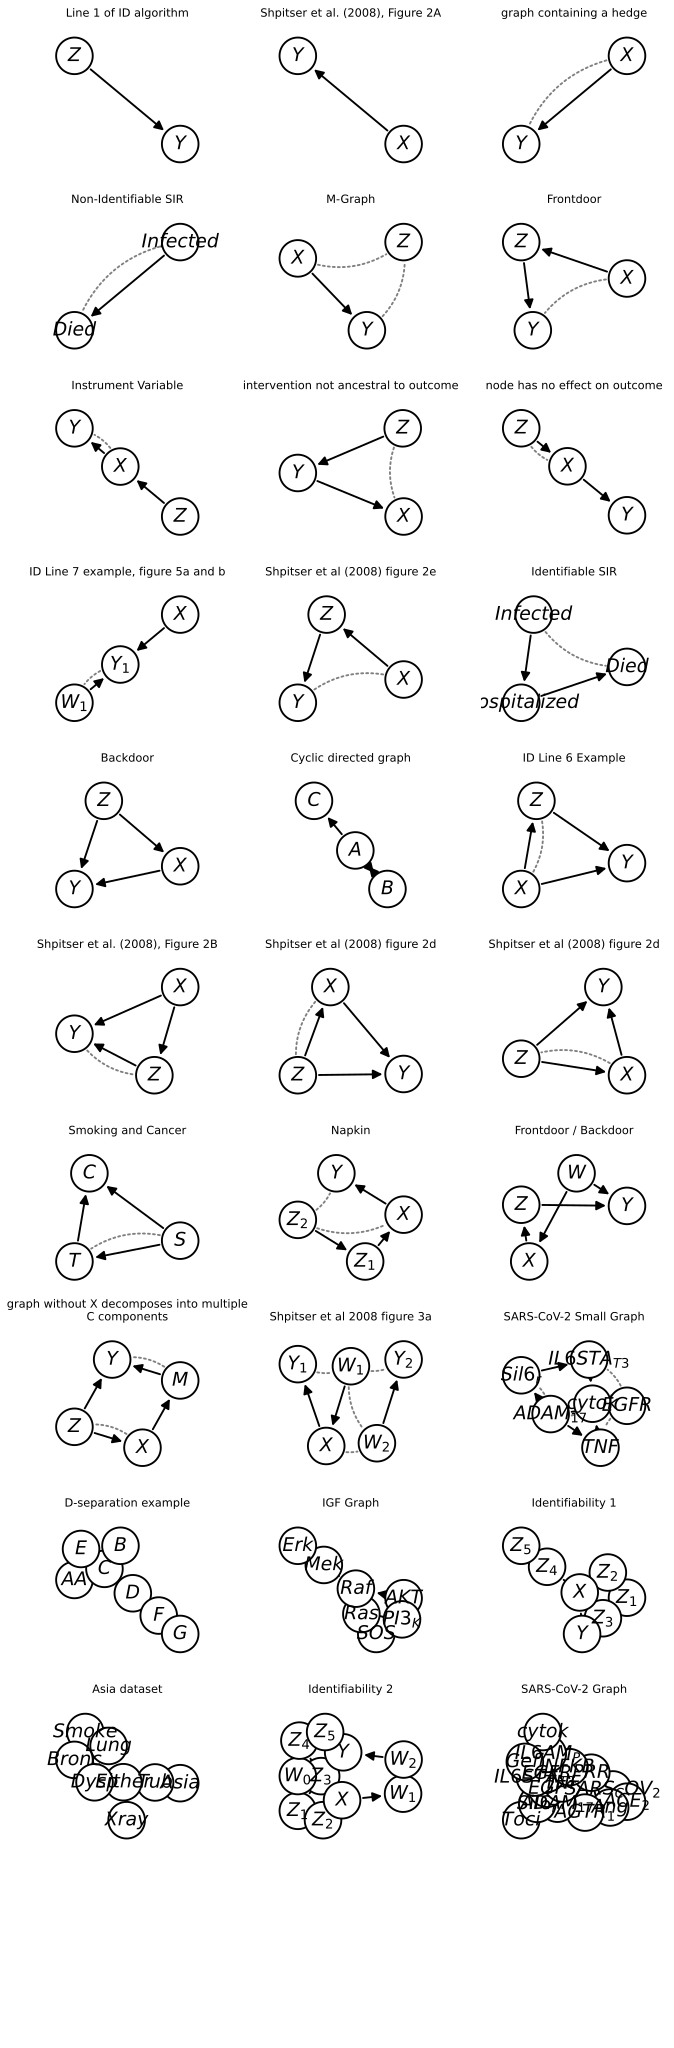

In [3]:
def _key(example):
    return (
        example.graph.directed.number_of_nodes(),
        example.graph.directed.number_of_edges(),
        example.graph.directed.number_of_edges() + example.graph.undirected.number_of_edges(),
    )


examples = sorted(examples, key=_key)


n = len(examples)
ncols = 3
nrows = int(n / ncols + 1)

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(4.0 * ncols, 3.5 * nrows),
)
for example, ax in zip_longest(examples, axes.ravel()):
    if example is None:
        ax.axis("off")
        continue
    title = textwrap.fill(example.name, width=40)
    example.graph.draw(title=title, ax=ax, latex=True, prog="osage")